# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import statsmodels.api as sm
import seaborn as sns

In [4]:
#%matplotlib inline

#from IPython.core.pylabtools import figsize


#figsize(12, 8)

#sns.set()

In [87]:
athletes = pd.read_csv("athletes.csv")

In [88]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [89]:
# Sua análise começa aqui.
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [90]:
# Summary
athletes[['height','weight']].describe()

,height,weight
count,11208.000000,10879.000000
mean,1.766282,72.068205
std,0.112719,16.177334
min,1.210000,31.000000
25%,1.690000,60.000000
50%,1.760000,70.000000
75%,1.840000,81.000000
max,2.210000,170.000000


## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [91]:
def q1(alpha=0.05):
    # Pegue amostragem
    amostra = get_sample(athletes, 'height', n=3000)
    # Fazer teste
    statistics, p_value = sct.shapiro(amostra)
    # Avaliar resultado a partir do p-valor
    if p_value > alpha: # Aceitamos H0
        return True
    else: # Rejeitamos H0
        return False

In [92]:
# Resposta
q1()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

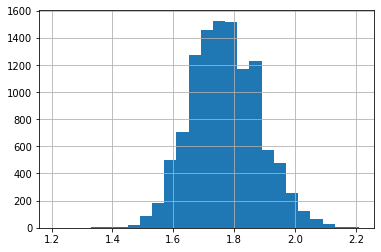

In [93]:
# Histograma
athletes['height'].hist(bins=25);

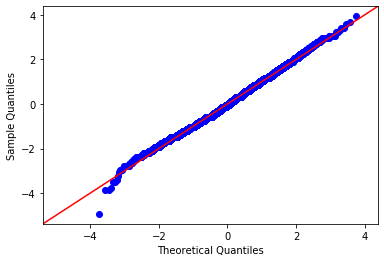

In [94]:
# Remover NaN da coluna
alturas = athletes['height'].dropna(how='any',axis=0)
# Gerar plot
sm.qqplot(alturas, fit=True, line="45");

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [95]:
def q2(alpha=0.05):
    # Pegue amostragem
    amostra = get_sample(athletes, 'height', n=3000)
    # Fazer teste
    statistics, p_value = sct.jarque_bera(amostra)
    # Avaliar resultado a partir do p-valor
    if p_value > alpha: # Aceitamos H0
        return True
    else: # Rejeitamos H0
        return False

In [96]:
# Avaliar resultado
q2()

False

__Para refletir__:

* Esse resultado faz sentido? Sim, o histograma mostra a ausência de caldas

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [97]:
def q3(alpha=0.05):
    # Pegue amostragem
    amostra = get_sample(athletes, 'weight', n=3000)
    # Fazer teste
    statistics, p_value = sct.normaltest(amostra)
    # Avaliar resultado a partir do p-valor
    if p_value > alpha: # Aceitamos H0
        return True
    else: # Rejeitamos H0
        return False

In [98]:
# Avaliar resposta
q3()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

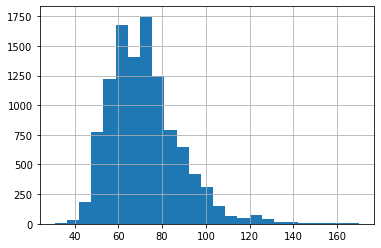

In [99]:
# Histograma
athletes['weight'].hist(bins=25);

Graficamente é possível avaliar uma calda na direita e uma certa assimetrica, então é condizente.

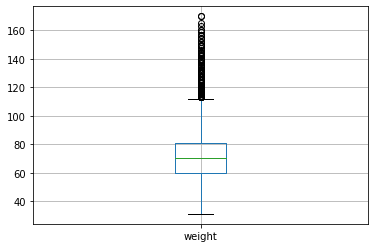

In [101]:
# Boxplot
athletes.boxplot(column=['weight']);

A presença de muitos outliers superiores fortalece o gráfico do histograma mostrando a assimetria da distribuição

## Questão 4

Realize uma transformação logarítmica na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [128]:
def q4(alpha=0.05):
    # Transformacao log na variavel inteira
    athletes['weight_new'] = np.log(athletes['weight'])
    # Pegue amostragem
    amostra = get_sample(athletes, 'weight_new', n=3000)
    # Fazer teste
    statistics, p_value = sct.normaltest(amostra)
    # Avaliar resultado a partir do p-valor
    if p_value > alpha: # Aceitamos H0
        return True
    else: # Rejeitamos H0
        return False

In [129]:
# Avaliar resposta
q4()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

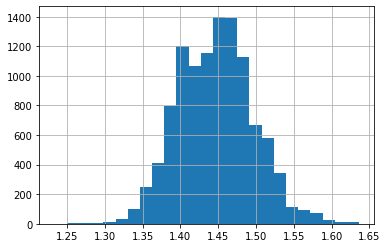

In [104]:
athletes['weight'] = np.log(athletes['weight'])
# Histograma
athletes['weight'].hist(bins=25);

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [105]:
# Dataset das questoes 5, 6, 7
df = athletes[(athletes['nationality'] == 'USA')|(athletes['nationality'] == 'BRA')|(athletes['nationality'] == 'CAN')]
# Manter apenas colunas importantes
df = df[['nationality', 'height']]

In [106]:
# Pegar amostras para cada país sem valores faltantes
bra = df.loc[df['nationality'] == 'BRA', 'height'].dropna()
can = df.loc[df['nationality'] == 'CAN', 'height'].dropna()
usa = df.loc[df['nationality'] == 'USA', 'height'].dropna()

In [119]:
def q5(alpha=0.05):
    # Fazer teste
    statistics, p_value = sct.ttest_ind(bra, usa, equal_var=False, nan_policy='omit')
    # Avaliar resultado a partir do p-valor
    if p_value > alpha: # Aceitamos H0
        return True
    else: # Rejeitamos H0
        return False

In [120]:
# Resposta
q5()

False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [117]:
def q6(alpha=0.05):
    # Fazer teste
    statistics, p_value = sct.ttest_ind(bra, can, equal_var=False, nan_policy='omit')
    # Avaliar resultado a partir do p-valor
    if p_value > alpha: # Aceitamos H0
        return True
    else: # Rejeitamos H0
        return False

In [118]:
# Resposta
q6()

True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [122]:
def q7(alpha=0.05):
    # Fazer teste
    statistics, p_value = sct.ttest_ind(usa, can, equal_var=False, nan_policy='omit')
    # Return
    return float(round(p_value, 8))

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?

In [123]:
# Resposta
q7()

0.00046601